<h1><strong>Multinomial Naive Bayes </strong></h1>
<h3> 'Breve Descripción' </h3>
<br> Importo los modulos necesarios

In [28]:
import pandas as pd
import nbimporter # pip install nbimporter


import sklearn
from sklearn.naive_bayes  import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score, plot_confusion_matrix

import matplotlib.pyplot as plt

from feature_builder import process_dataset
from hyperparameter_tunning import obtener_hiperparametros

<h3>Cargo los datos necesarios

In [2]:
train_dataset = pd.read_csv('train.csv')

In [3]:
y = train_dataset.loc[:,'target']

In [10]:
params = obtener_hiperparametros()['MNB']

<h2><strong>Declaro las distintas combinaciones de features

TF-IDF y spacy

In [24]:
x_tfidf = process_dataset(train_dataset, text_type='tfidf', use_spacy=False)

In [25]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size = .33, random_state = 17)

TF-IDF solo

In [32]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_dataset['text'])

In [33]:
x_train_tfidf_solo, x_test_tfidf_solo, y_train_tfidf_solo, y_test_tfidf_solo = train_test_split(X, y, test_size = .30, random_state = 17)

Embeddings y spacy

In [16]:
x_processed = process_dataset(train_dataset, use_spacy=True)

Embeddings loaded!
Percentage of words covered in the embeddings = 0.4937444933920705
Embeddings loaded!
Percentage of words covered in the embeddings = 0.5961027457927369


In [17]:
x_train_processed, x_test_processed, y_train_processed, y_test_processed = train_test_split(x_processed, y, test_size = .33, random_state = 17)

<h2><strong>Ahora pruebo los algoritmos

<h3>Primero pruebo con tf-idf

In [26]:
MultiNB_tfidf = MultinomialNB(**params)

In [27]:
MultiNB_tfidf.fit(x_train_tfidf, y_train_tfidf)
y_pred = MultiNB_tfidf.predict(x_test_tfidf)
f1_score(y_test_tfidf, y_pred)

0.4539704848910752

<h3>Ahora solo tf_idf dado el bajo resultado.

In [34]:
MultiNB_tfidf_solo = MultinomialNB(**params)

In [36]:
MultiNB_tfidf_solo.fit(x_train_tfidf_solo, y_train_tfidf_solo)
y_pred = MultiNB_tfidf_solo.predict(x_test_tfidf_solo)
f1_score(y_test_tfidf_solo, y_pred)

0.7209994051160024

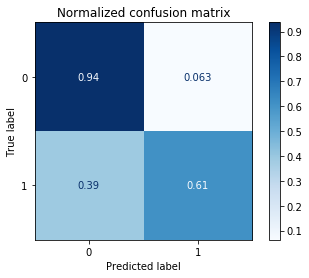

In [38]:
disp = plot_confusion_matrix(MultiNB_tfidf_solo, x_test_tfidf_solo, y_test_tfidf_solo,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Normalized confusion matrix')
plt.show()

<h3>Embeddings, spacy y manuales

In [18]:
MultiNB_embedd = MultinomialNB(**params)

In [ ]:
MultiNB_embedd.fit(x_train_processed, y_train_processed)
y_pred_proc = MultiNB_embedd.predict(x_test_processed)
f1_score(y_test_processed, y_pred_proc)

Esto no se puede ejecutar ya que el dataframe contiene datos negativos.

<h2>Paso a exportar el mejor resultado

In [ ]:
x_train_final = process_dataset(train_dataset, text_type='tfidf', use_spacy=True)

In [ ]:
x_test_final = process_dataset(test_dataset, text_type='tfidf', use_spacy=True)

In [ ]:
export_model_csv(MultiNB, x_train_final, x_test_final, y, 'MNB-tfidf-spacy')